# EDA on Titanic DataSet

Importing required libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt

Loading the titanic dataset

In [32]:
df = pd.read_csv('titanic_train.csv')

# Performing EDA(Exploratory Data Analysis)

In [33]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [35]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

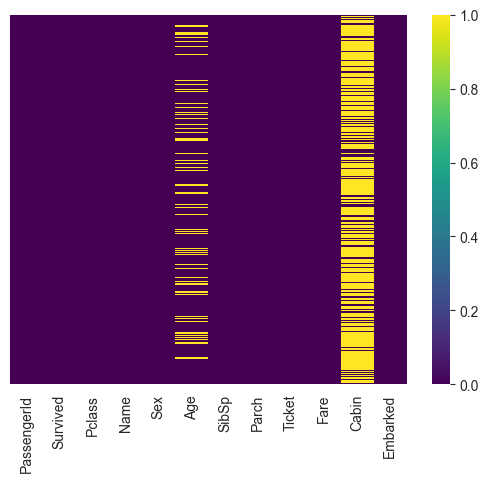

In [37]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

Now as we can see about 30 % data is missing in the age column . We can replace this with using some method of imputation

In the case of cabin , too many null values are there which makes it very difficult to build a useful insight  

# Finding relationship between the variables

<AxesSubplot: xlabel='Survived', ylabel='count'>

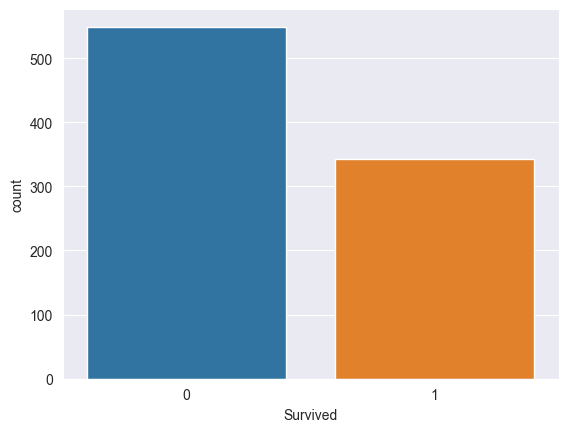

In [38]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df)



This graph shows that around 340 people survived and 530 did not survived

<AxesSubplot: xlabel='Survived', ylabel='count'>

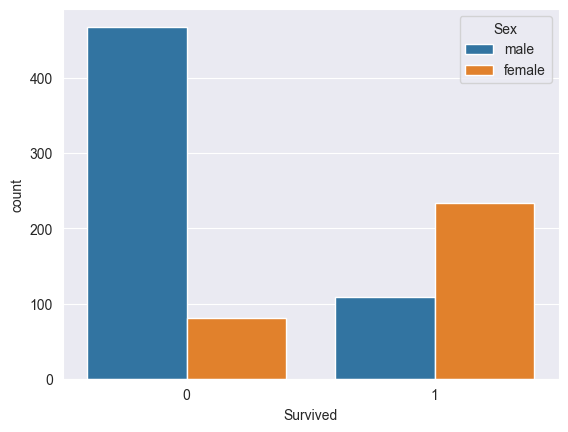

In [39]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=df)


This graph shows that more females survived during the titanic wreckage. This clearly shows that women were given preference over men 

<AxesSubplot: xlabel='Survived', ylabel='count'>

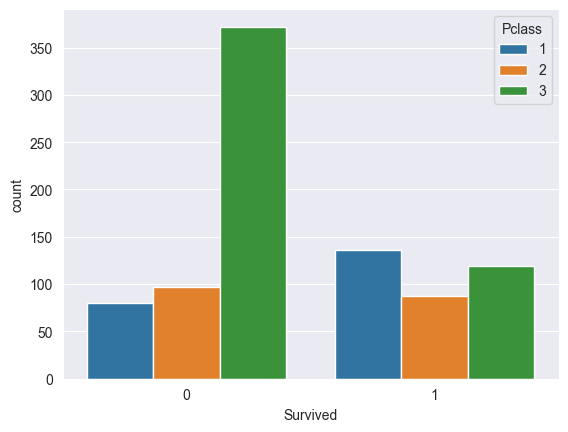

In [40]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=df)


We can clearly see that people from Pclass 1 survived the most as they were the richest one.

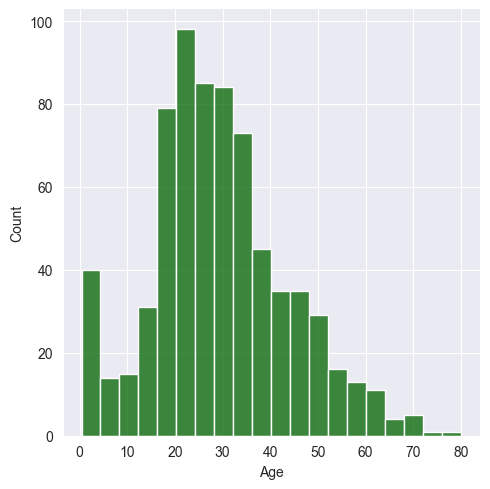

In [41]:
sns.set_style('darkgrid')
sns.displot(df['Age'].dropna(),kde=False,color='darkgreen')

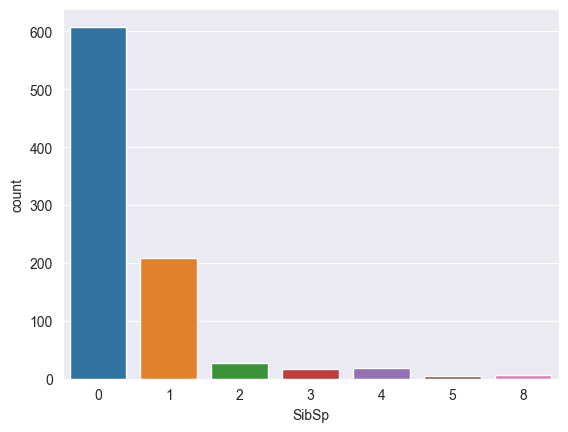

In [42]:
sns.countplot(x='SibSp',data=df)
sns.set_style('darkgrid')

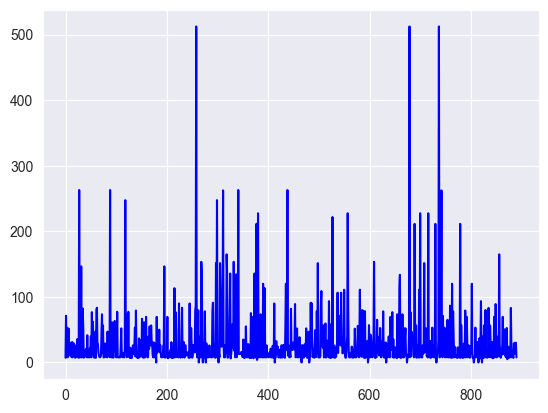

In [43]:
plt.plot(df['Fare'],color='blue')

# Checking for Outliers

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

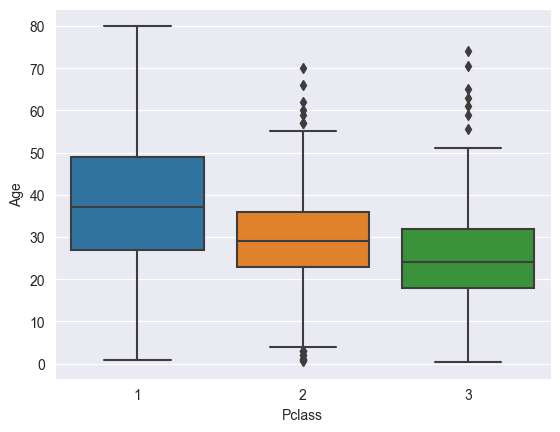

In [44]:
sns.boxplot(x='Pclass',y='Age',data=df)

# Removing Outliers

In [45]:
def impute_age(cols):
    
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age
        

In [46]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [47]:
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot: >

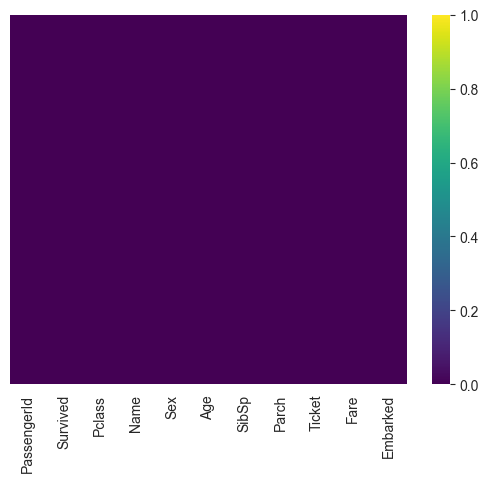

In [48]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

# Outliers Removed!!